Networkx offers an easy way to find a minimum cut: through the use of its ``nx.minimum_cut(G)`` functionality. Let's take a look at the following example.

In [1]:
# pip install gurobipy


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = [10, 10]

## Graph
### Generation

We will assume that every edge has a capacity of 1 in the benchmark instance of the Les Misérables.

In [3]:
G=nx.les_miserables_graph()
for (i,j,d) in G.edges(data=True):
    d['capacity']=1

### Selecting a source and a terminal

Recall that we need to select two distinct nodes to serve as the source and the terminal. We may use the ``random.sample`` functionality from the ``random`` package to help us pick two nodes.

In [4]:
pair=random.sample(G.nodes(),2)

print(pair)

['Courfeyrac', 'Child1']


## Minimum cut

### Value and partition

We can now use the networkx functionality to find the minimum cut. We need to provide the graph we want to partition, the source, and the terminal. As output, we get two items:

* value: the value of the minimum cut (i.e., the summation of all forward-arc capacities).
* partition: the two partitions we obtain when removing the arcs in the cut.

In [5]:
value,partition=nx.minimum_cut(G, pair[0], pair[1])
print(value)
print(partition[0])

2
{'Simplice', 'MmeBurgon', 'MmeMagloire', 'LtGillenormand', 'MmeThenardier', 'Woman1', 'Favourite', 'Combeferre', 'Toussaint', 'BaronessT', 'Perpetue', 'Mabeuf', 'Brujon', 'Chenildieu', 'Enjolras', 'MotherPlutarch', 'Scaufflaire', 'Woman2', 'Bahorel', 'Javert', 'Magnon', 'Brevet', 'Thenardier', 'Champmathieu', 'Count', 'Fauchelevent', 'Zephine', 'OldMan', 'Dahlia', 'MotherInnocent', 'Eponine', 'Grantaire', 'Courfeyrac', 'Cochepaille', 'Fantine', 'Montparnasse', 'Cosette', 'Gavroche', 'MmeHucheloup', 'Tholomyes', 'Anzelma', 'Blacheville', 'Feuilly', 'Claquesous', 'MlleGillenormand', 'Geborand', 'Gillenormand', 'Fameuil', 'Gervais', 'Napoleon', 'Boulatruelle', 'Judge', 'Listolier', 'Gribier', 'Isabeau', 'CountessDeLo', 'Gueulemer', 'Prouvaire', 'Champtercier', 'Marguerite', 'Marius', 'Child2', 'Valjean', 'Joly', 'Bamatabois', 'MmePontmercy', 'Myriel', 'MmeDeR', 'Jondrette', 'Pontmercy', 'MlleVaubois', 'Bossuet', 'Babet', 'MlleBaptistine', 'Labarre', 'Cravatte'}


### The cut

To obtain the actual cut-set (the arcs that belong to the cut), we need to check all the possible connections between members of the two partitions. That is, we need to check all arcs that have one end-point on one partition and the other end-point on the second partition. One way to achieve this is shown here:

In [6]:
cut=[(i,j) for i in partition[0] for j in partition[1] if (i,j) in G.edges()]
print(cut)

[('Gavroche', 'Child1'), ('Child2', 'Child1')]


## Visualization

### Visualizing the cut

We can show the cut in two ways. We can either color the two different partitions so as to easily tell them apart and/or we can color/stylize the arcs in the cutset. Here we show both.

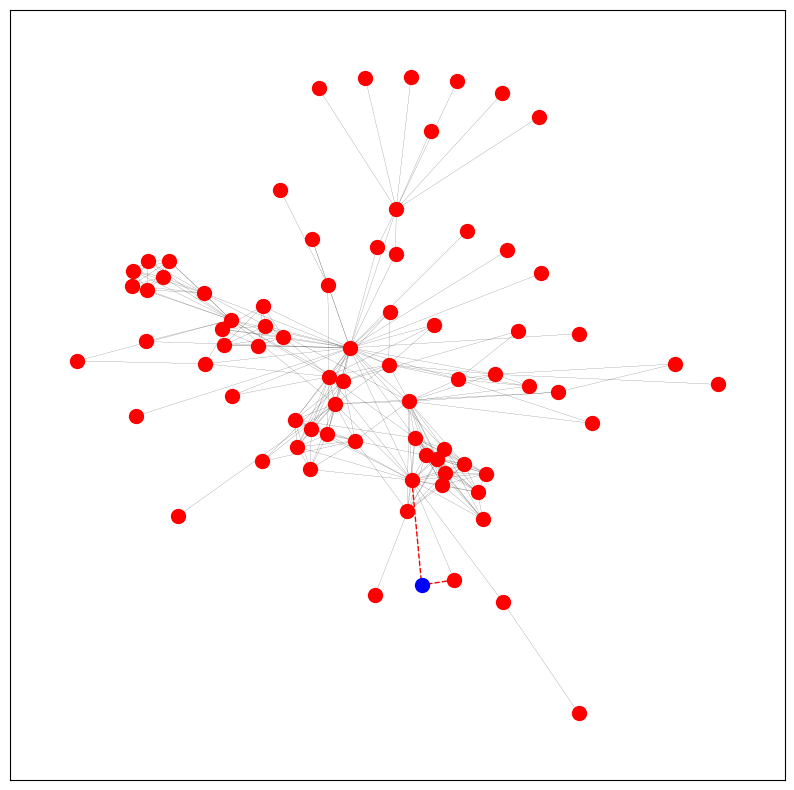

In [7]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=partition[0], node_color='r', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=partition[1], node_color='b', node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.1)
nx.draw_networkx_edges(G, pos, edgelist=cut, style='--', width=1, edge_color='r')

## The problem with minimum cuts

If we run the previous part of the code many times, we start observing a weird pattern. Almost always, the cut is imbalanced; that is, it produces two partitions, where one is much smaller than the other. Let's see if we can fix this.

### Vertex separators

First, we introduce vertex separators. We can find all minimum cardinality vertex separators using the ``nx.all_node_cuts(G)`` functionality.

In [8]:
cutsets = list(nx.all_node_cuts(G))
print(len(cutsets))

8


### Visualization for vertex separators

We need to do a couple of things to fully visualize a vertex separator. First of all, for every vertex separator we will create a new network: a copy of the original one. Then, we will remove the nodes that are part of the separator and obtain the connected components. Finally, we will visualize each component with a different color in an attempt to tell them apart.

For the next part to work correctly, please make sure to create a folder called ``imgs`` in your running directory.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

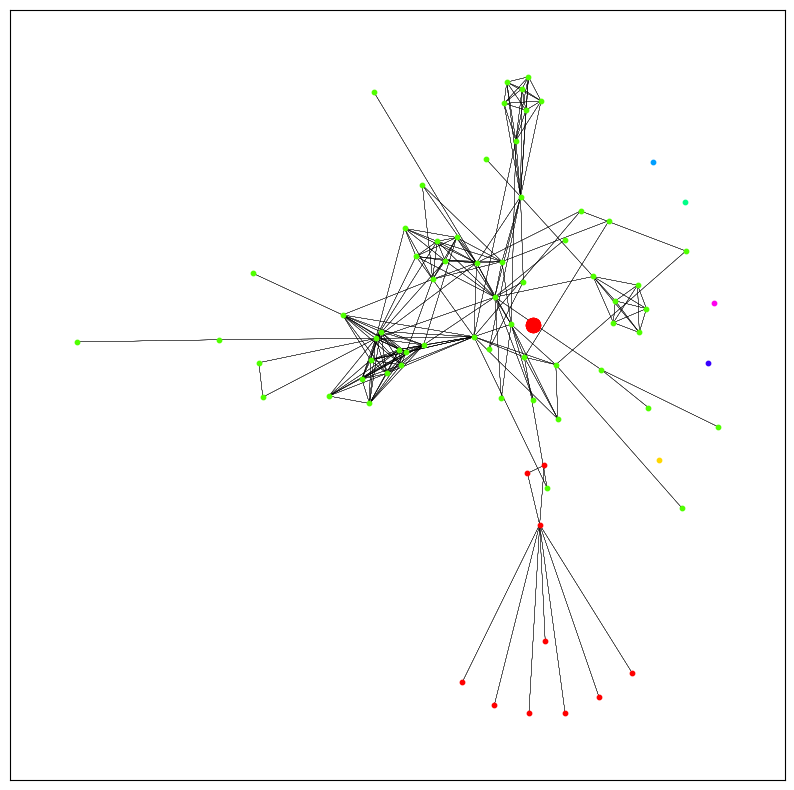

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


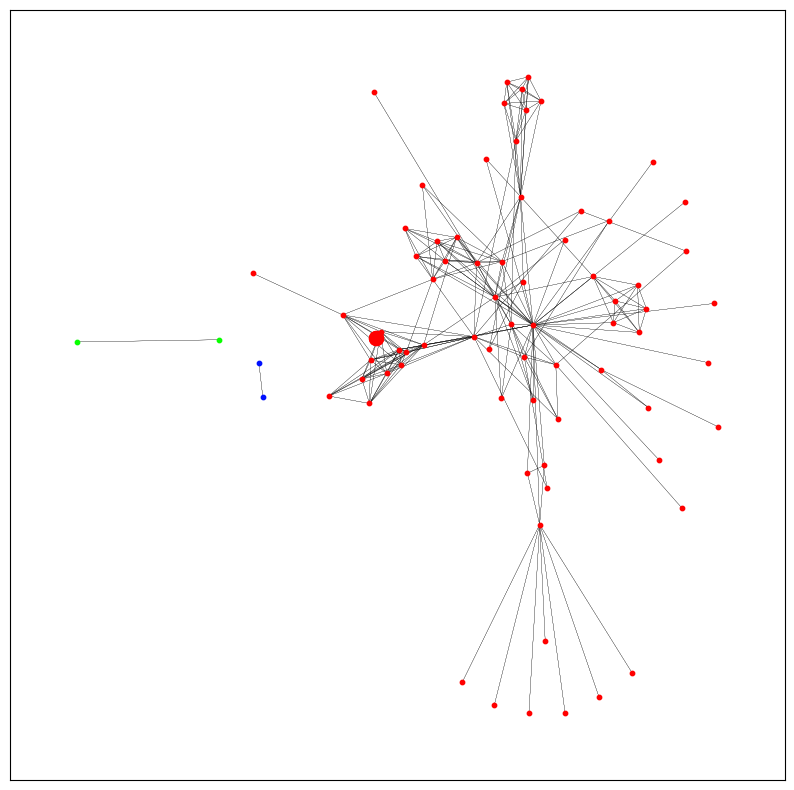

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

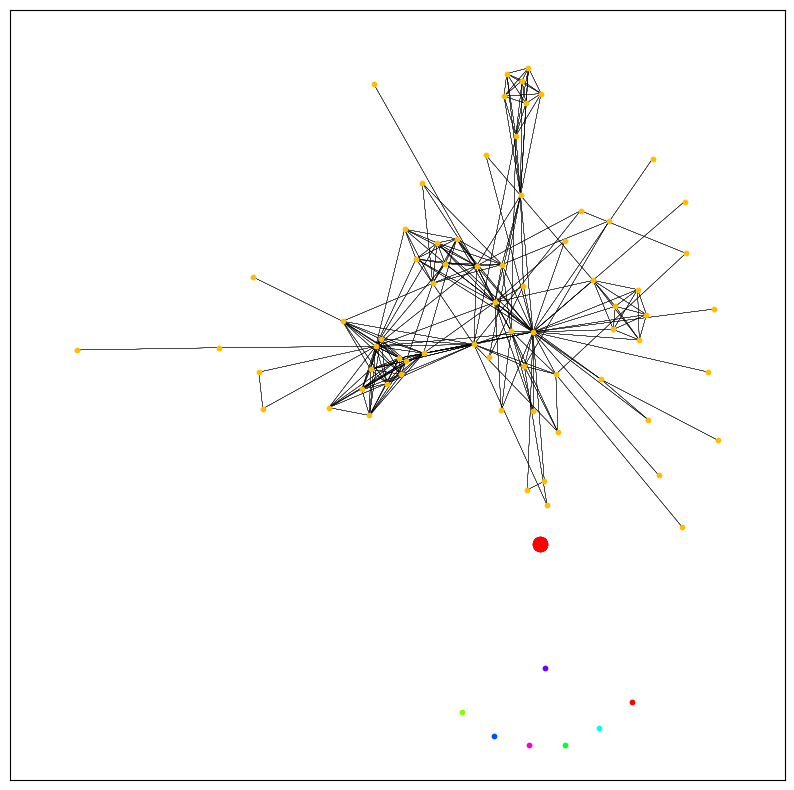

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


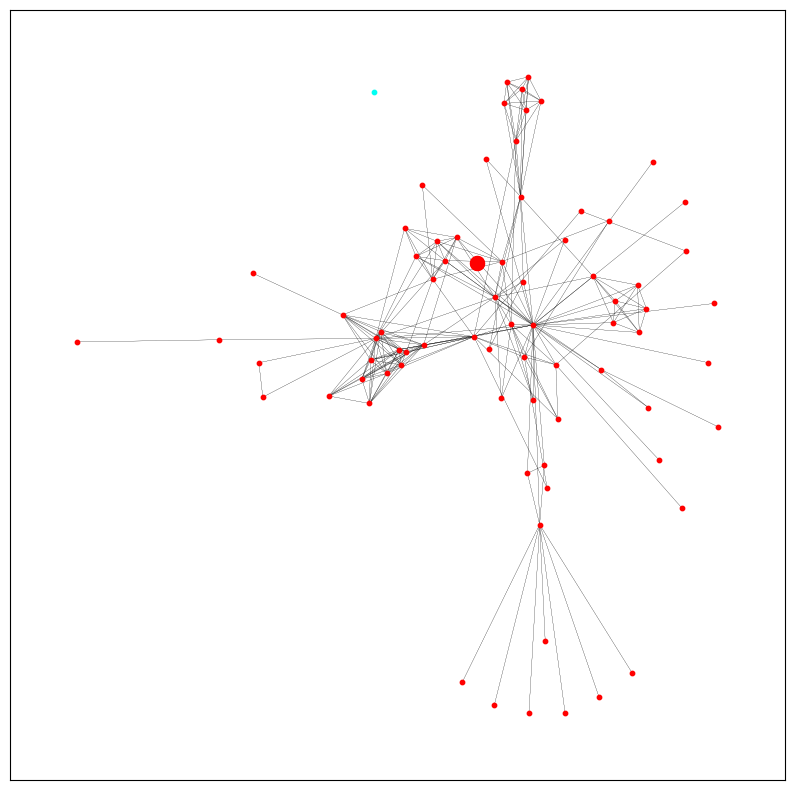

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


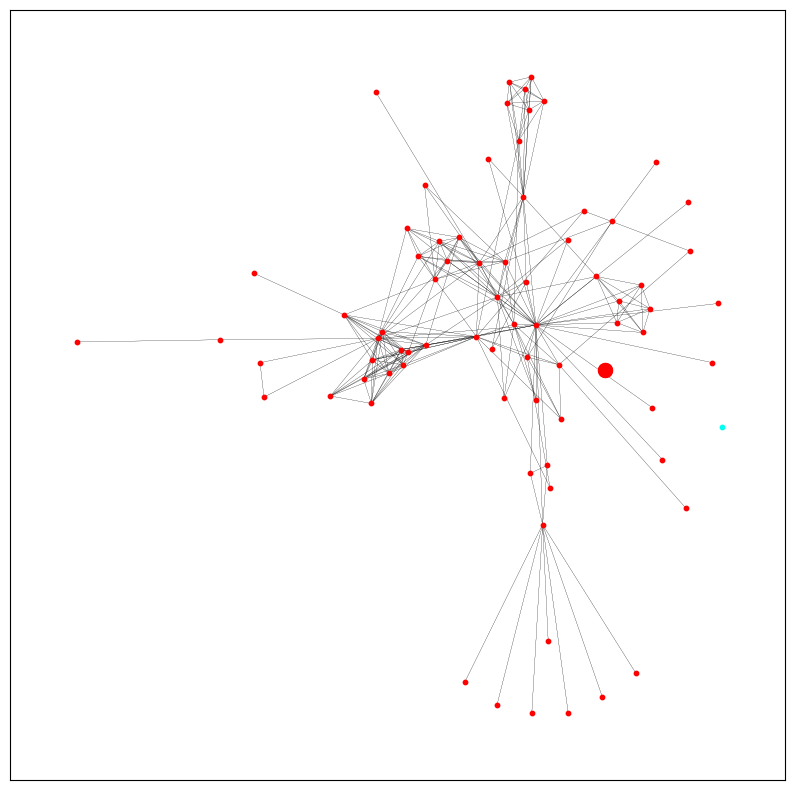

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


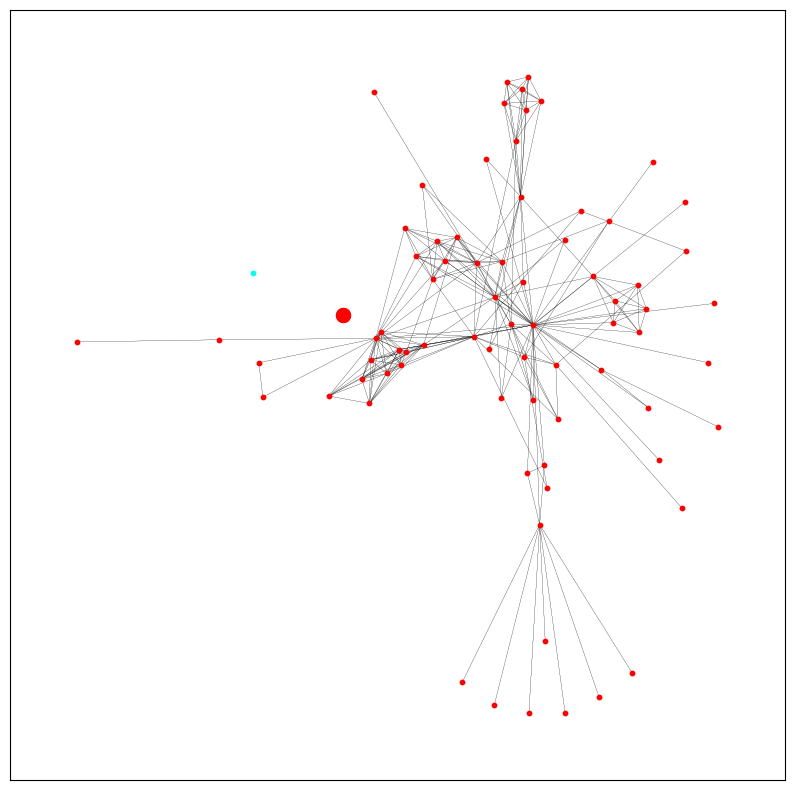

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


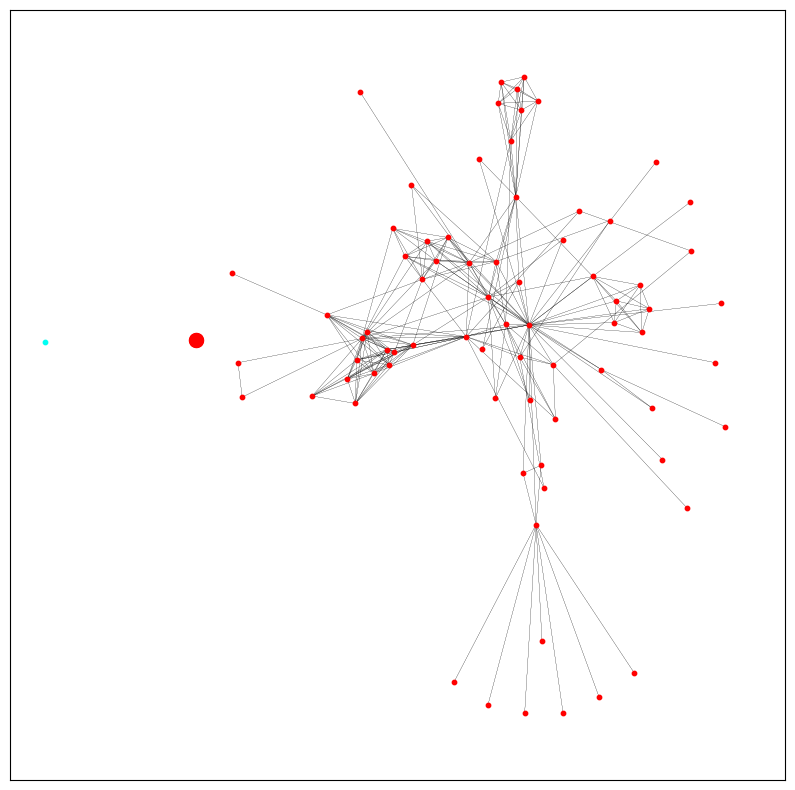

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


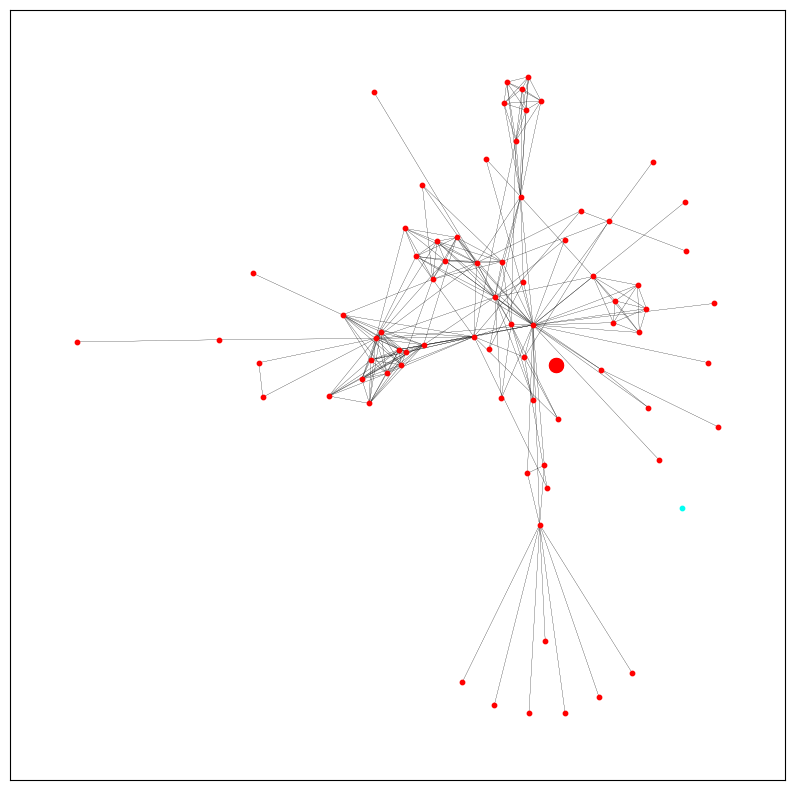

In [9]:
H=nx.Graph()
pos=nx.spring_layout(G)
for vertex_separator in cutsets:
    H.add_nodes_from(G)
    H.add_edges_from(G.edges)
    currentcut=[]
    for i in vertex_separator:
        currentcut.append(i)
        H.remove_node(i)
    gcc = list(nx.connected_components(H))
    num_colors=len(gcc)+1
    my_colors=plt.cm.get_cmap('hsv', num_colors)

    for index, sg in enumerate(gcc):
        #print(index, sg)
        nx.draw_networkx_nodes(sg, pos, node_color = my_colors(index), node_size=10)
        # nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='b', node_size=10)
        nx.draw_networkx_nodes(G, pos, nodelist=currentcut, node_color='r', node_size=100)
        nx.draw_networkx_edges(G, pos, edgelist=H.edges(), width=0.1)
    plt.show()
    # plt.savefig("./img/out_"+str(vertex_separator)+".png")
    plt.close()

### In-class activity

What if.. we want to have multiple (i.e., $k\geq 2$) source-terminal pairs that we want to disconnect from one another? That is, what if we are solving a minimum multi-cut problem?

Consult with the people close to you and make an attempt that is based on the following idea:

* for each source-terminal pair find the minimum cut.
* create a list with all arcs in at least one minimum cut.
* the list of arcs is a valid multi-cut.

What do you think? Is it also minimum?

In [10]:
G=nx.les_miserables_graph()
for (i,j,d) in G.edges(data=True):
    d['capacity']=1

k=5 # number of source-terminal pairs we want to disconnect
sources=random.sample(G.nodes(),k)
terminals=random.sample(G.nodes(),k)

print(terminals)

['Javert', 'Claquesous', 'Scaufflaire', 'MlleVaubois', 'Bamatabois']


In [11]:
# Fill this in
print(sources)
cut=[]
all_cuts=[]
for ii in terminals:
  for jj in sources:
    value,partition=nx.minimum_cut(G, ii, jj)
    cut=[(i,j) for i in partition[0] for j in partition[1] if (i,j) in G.edges()]
    for (i,j) in cut:
      # if(i,j) in G.edges():
        if (i,j) not in all_cuts:
          all_cuts.append((i,j))

# print(cut)
# for i in len(cut):
print(all_cuts)


# print(partition[1])
# for i in terminals:
  # value,partition=nx.minimum_cut(G, i, sources)
  # print(partition[0])


['Gervais', 'Anzelma', 'Cosette', 'MmeHucheloup', 'Perpetue']
[('Valjean', 'Gervais'), ('MmeThenardier', 'Anzelma'), ('Thenardier', 'Anzelma'), ('Eponine', 'Anzelma'), ('LtGillenormand', 'Cosette'), ('MmeThenardier', 'Cosette'), ('Toussaint', 'Cosette'), ('Woman2', 'Cosette'), ('Javert', 'Cosette'), ('Thenardier', 'Cosette'), ('Tholomyes', 'Cosette'), ('MlleGillenormand', 'Cosette'), ('Gillenormand', 'Cosette'), ('Marius', 'Cosette'), ('Valjean', 'Cosette'), ('Enjolras', 'MmeHucheloup'), ('Bahorel', 'MmeHucheloup'), ('Grantaire', 'MmeHucheloup'), ('Courfeyrac', 'MmeHucheloup'), ('Gavroche', 'MmeHucheloup'), ('Joly', 'MmeHucheloup'), ('Bossuet', 'MmeHucheloup'), ('Simplice', 'Perpetue'), ('Fantine', 'Perpetue'), ('Claquesous', 'MmeThenardier'), ('Claquesous', 'Brujon'), ('Claquesous', 'Enjolras'), ('Claquesous', 'Javert'), ('Claquesous', 'Thenardier'), ('Claquesous', 'Eponine'), ('Claquesous', 'Montparnasse'), ('Claquesous', 'Gueulemer'), ('Claquesous', 'Valjean'), ('Claquesous', 'Babet

44


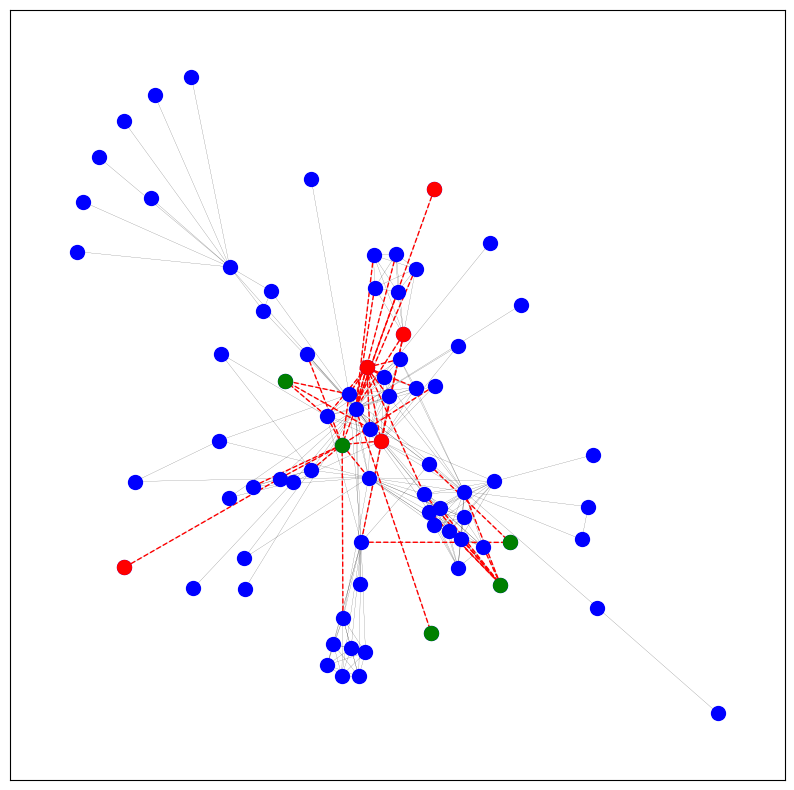

In [12]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='b', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=sources, node_color='g', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=terminals, node_color='r', node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.1)
nx.draw_networkx_edges(G, pos, edgelist=all_cuts, style='--', width=1, edge_color='r')
print(len(all_cuts))

### Integer program for minimum multicut

The main idea is to use the same formulation as in the minimum cut problem.. but for multiple source-terminal pairs!

In [15]:
# from re import M
from gurobipy import *


m=Model("min_cut")

y={}
for i in G.nodes():
  for ell in range(k):
    y[i,ell]=m.addVar()

v={}
# v=m.addVars(G.edges(),vtype=GRB.BINARY,obj=1)
for (i,j) in G.edges():
  v[i,j]=m.addVar(vtype=GRB.BINARY,obj=1)
  v[j,i]=m.addVar(vtype=GRB.BINARY,obj=1)

m.update()

# m.setObjective(quicksum(v[i,j] for (i,j) in G.edges()), GRB.MINIMIZE)

for ell in range(k):
  sources[ell],terminals[ell]
  m.addConstr(-y[sources[ell],ell]+y[terminals[ell],ell]==1)
  for (i,j)in G.edges():
    m.addConstr(y[i,ell]-y[j,ell]+v[i,j]>=0)
    m.addConstr(y[j,ell]-y[i,ell]+v[j,i]>=0)



m.optimize()
# Fill this in

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2545 rows, 893 columns and 7630 nonzeros
Model fingerprint: 0x42ecd954
Variable types: 385 continuous, 508 integer (508 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 37.0000000
Presolve removed 191 rows and 124 columns
Presolve time: 0.02s
Presolved: 2354 rows, 769 columns, 7062 nonzeros
Variable types: 293 continuous, 476 integer (476 binary)

Root relaxation: objective 8.000000e+00, 250 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       8.0000000    8.00000  0.00%     -    0s

Explored 0 nodes (250 simplex iterations) in

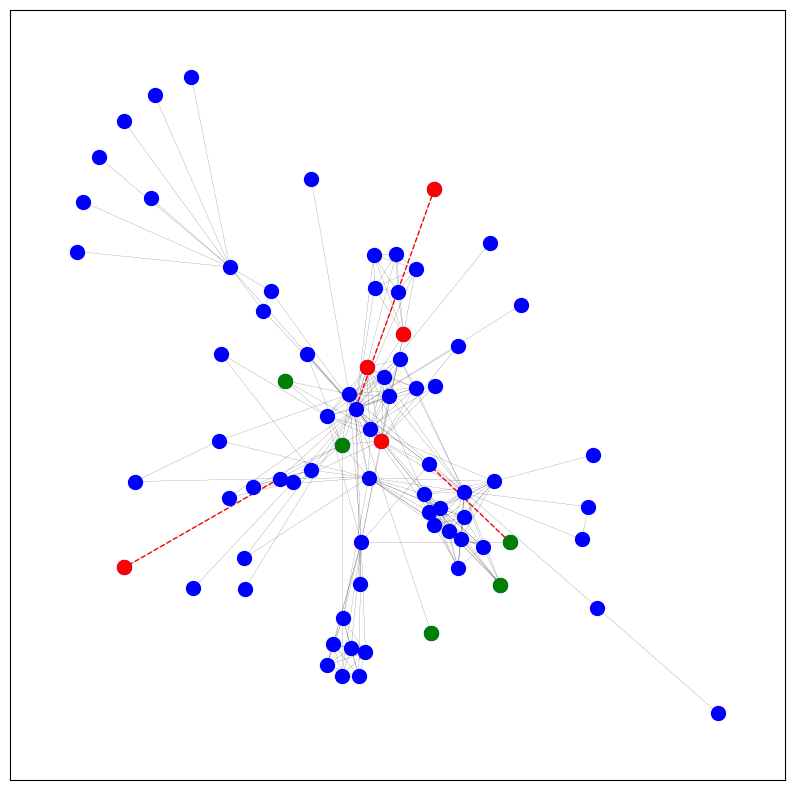

In [16]:
optimal_cut=[(i,j) for (i,j) in G.edges() if v[i,j].X>0]
#pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='b', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=sources, node_color='g', node_size=100)
nx.draw_networkx_nodes(G, pos, nodelist=terminals, node_color='r', node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.1)
nx.draw_networkx_edges(G, pos, edgelist=optimal_cut, style='--', width=1, edge_color='r')

#### Compare the solution you got from your solver to the one you got from the iterative minimum cut. What happens as $k$ increases?